# READ DATASET

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv')
df.head()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [4]:
df.tail()


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1
38983,55,175,60,81.1,1.0,1.0,1,1,114,66,...,64,137,13.9,1,1.0,18,12,16,0,1


# Sanity Check of data

In [5]:
df.shape

(38984, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

# Find Missing Values

In [7]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

# Finding Duplicates

In [8]:
df.duplicated().sum()

5517

In [9]:
df.nunique()



age                     14
height(cm)              13
weight(kg)              22
waist(cm)              545
eyesight(left)          19
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               125
relaxation              94
fasting blood sugar    258
Cholesterol            279
triglyceride           389
HDL                    122
LDL                    286
hemoglobin             143
Urine protein            6
serum creatinine        34
AST                    195
ALT                    230
Gtp                    439
dental caries            2
smoking                  2
dtype: int64

# EDA

In [10]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


<Figure size 1500x1200 with 0 Axes>

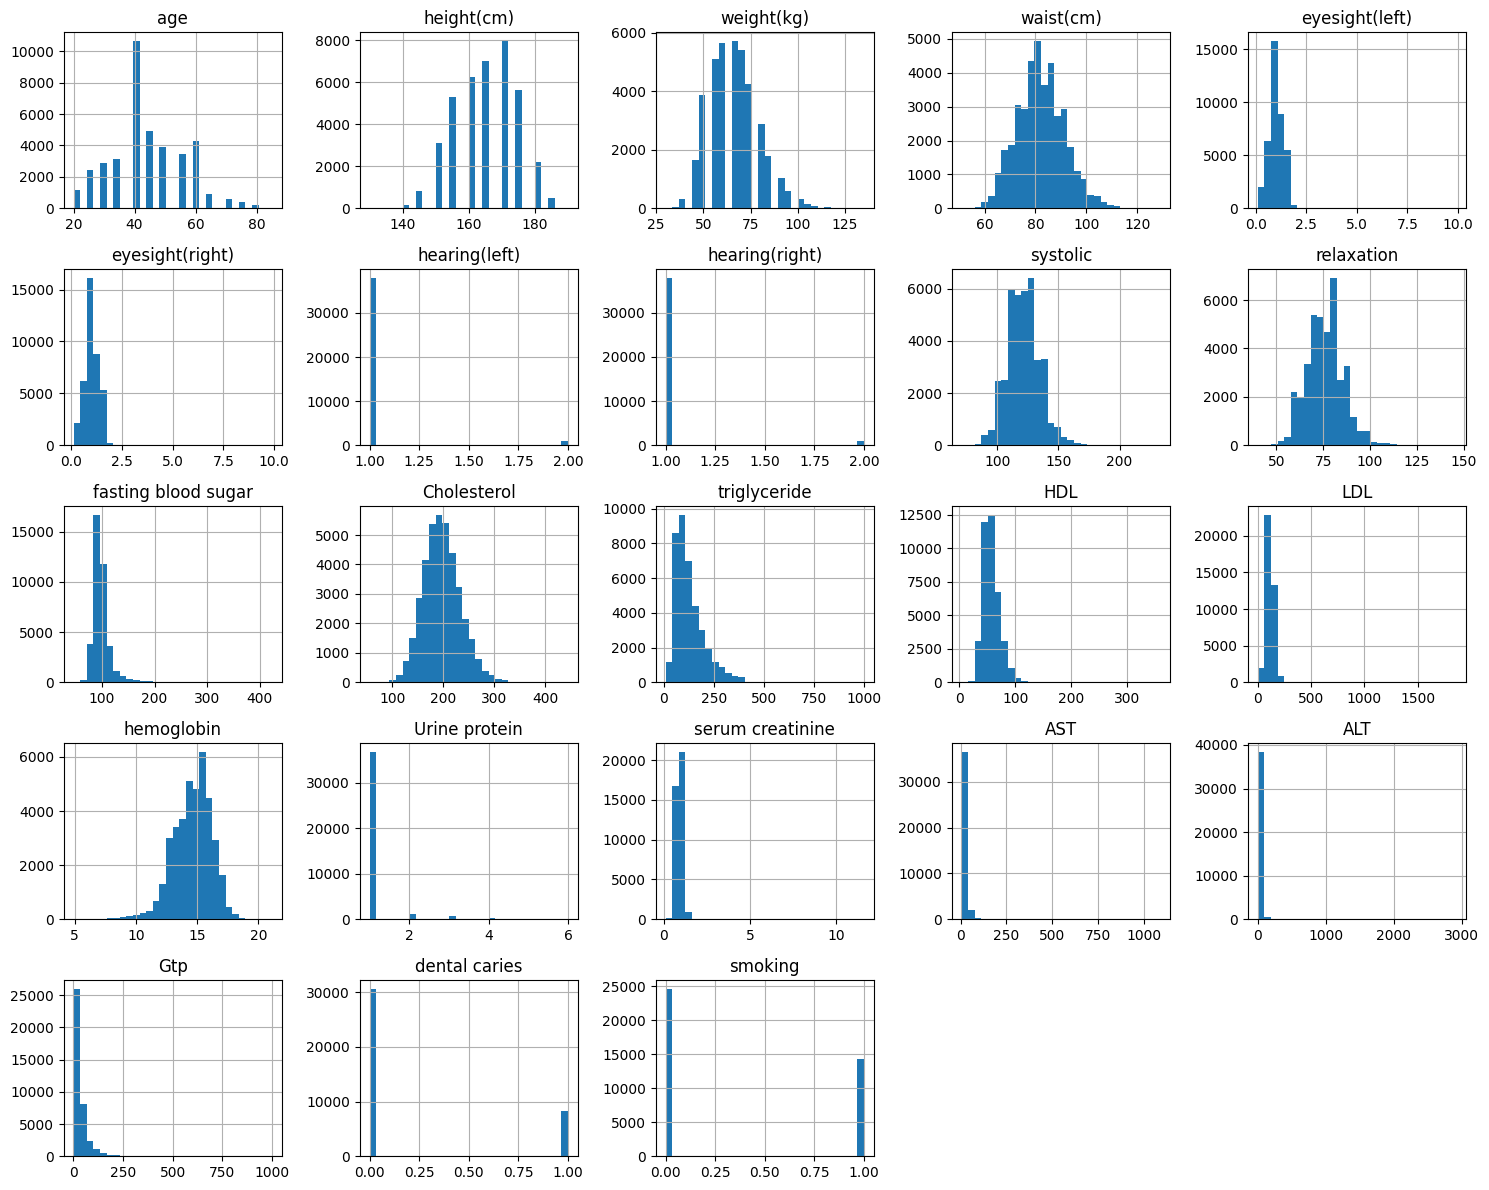

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
df.hist(figsize=(15,12), bins=30)
plt.tight_layout()

# Save as PDF
plt.savefig("histogram_plot.pdf")

# Save as PNG (optional, higher quality for reports)
plt.savefig("histogram_plot.png", dpi=300)

plt.show()


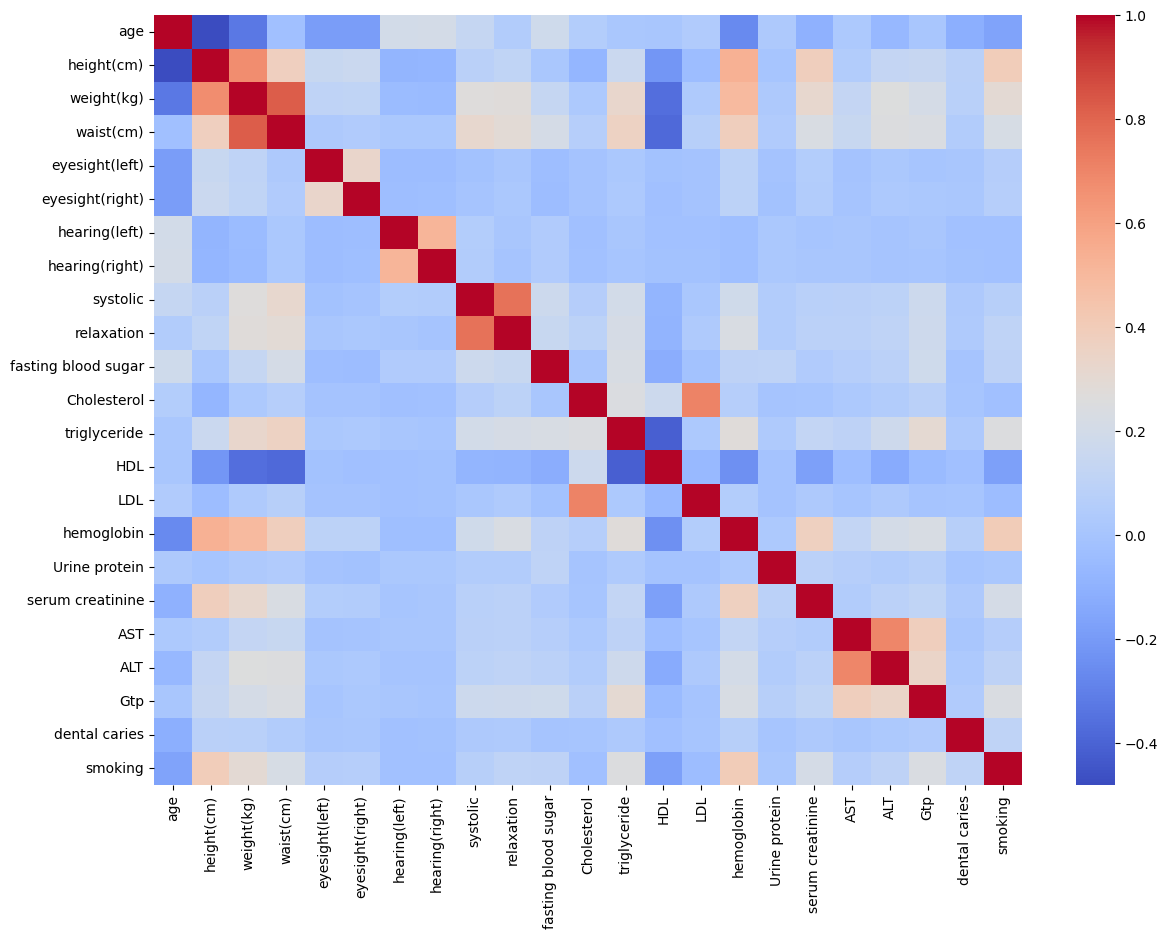

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.savefig("correlation_heatmap2.pdf", bbox_inches='tight')
plt.show()

Shape before: (38984, 23)
Shape after: (17393, 23)


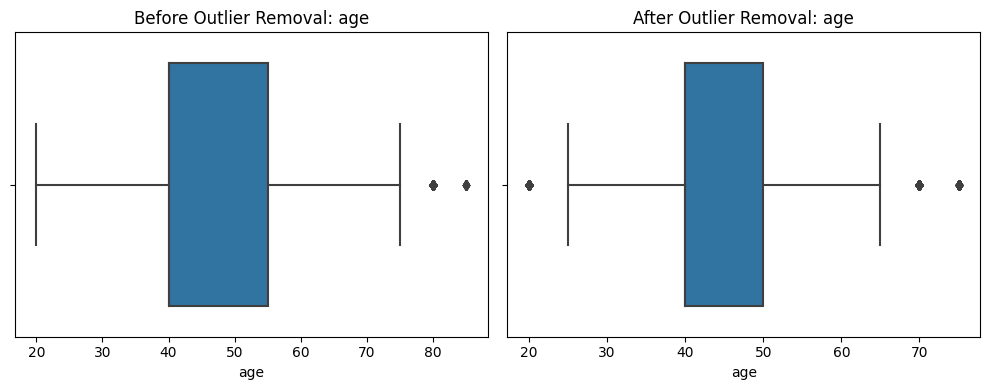

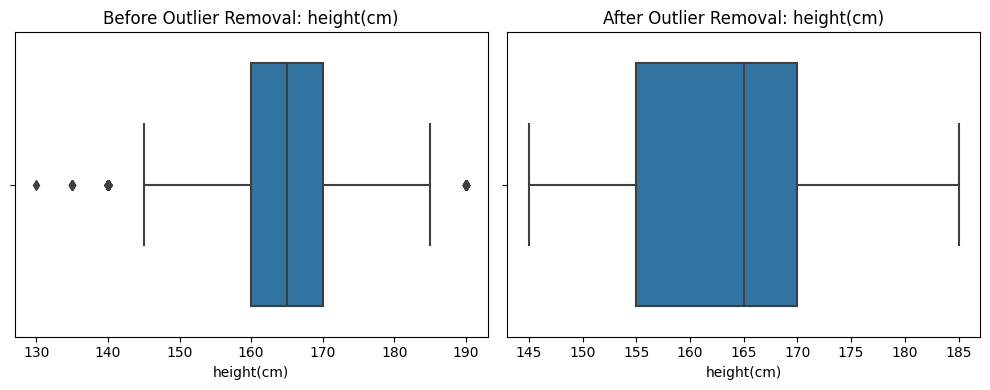

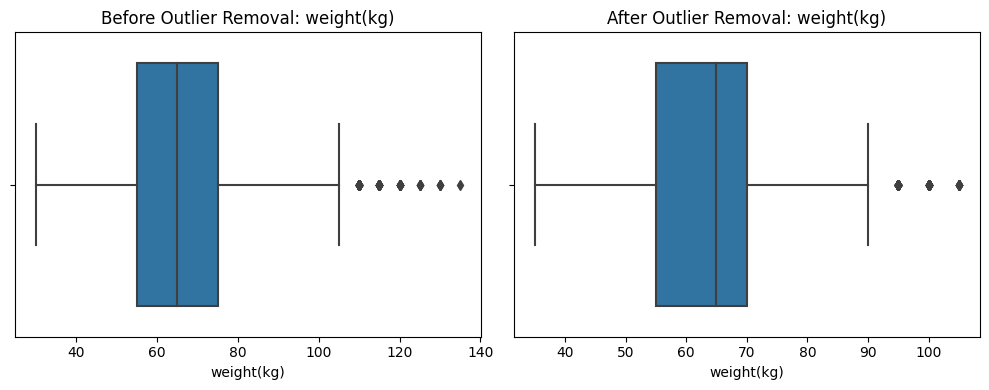

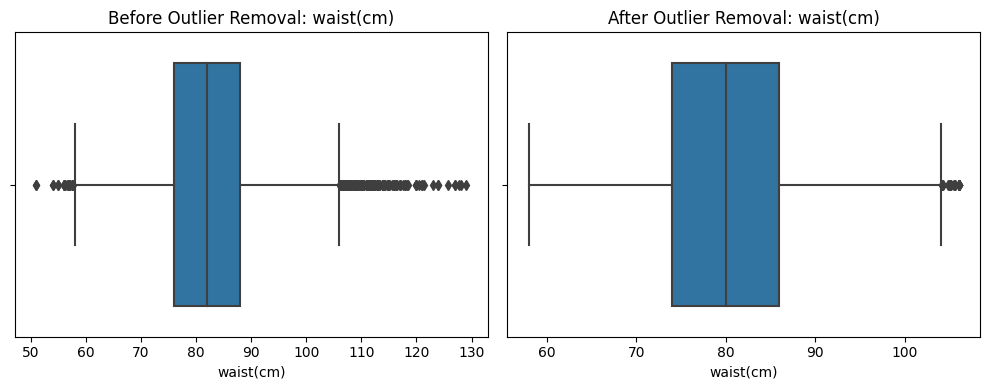

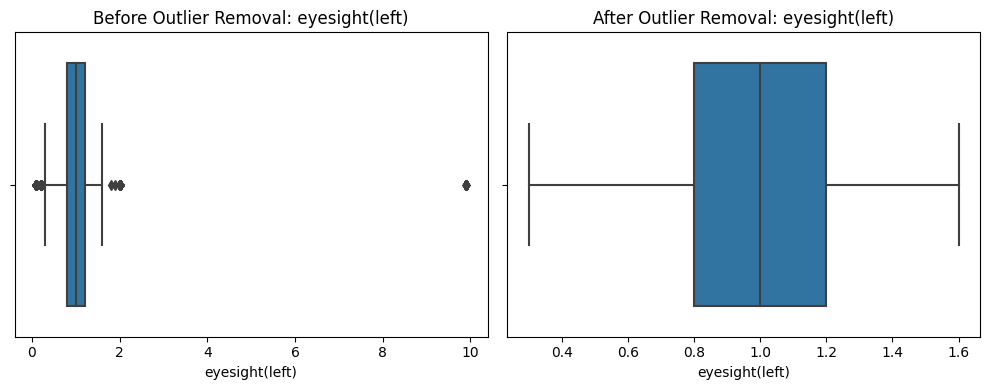

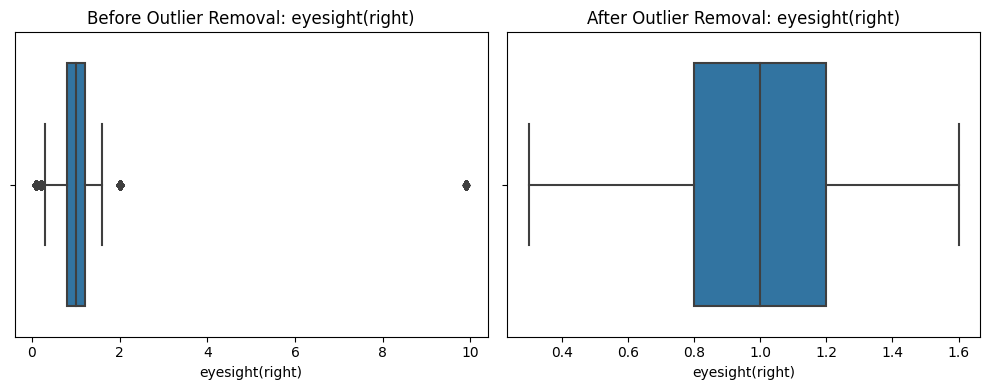

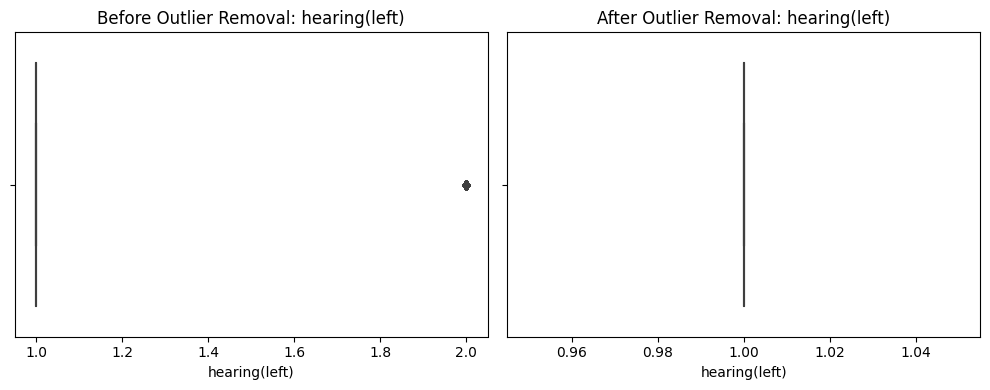

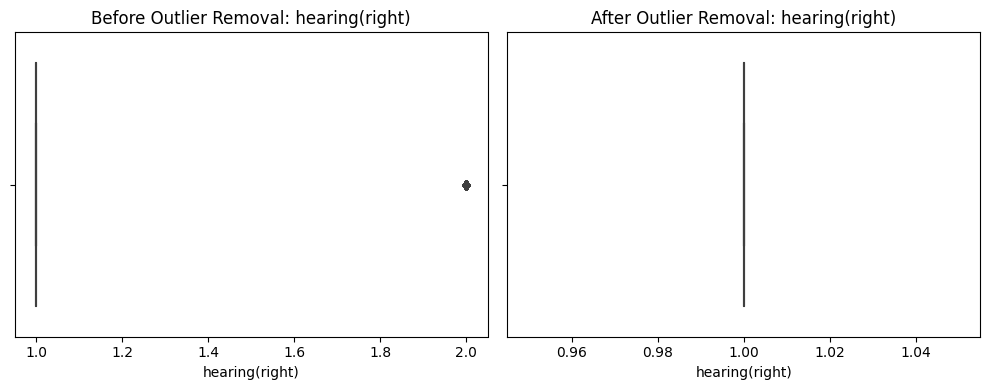

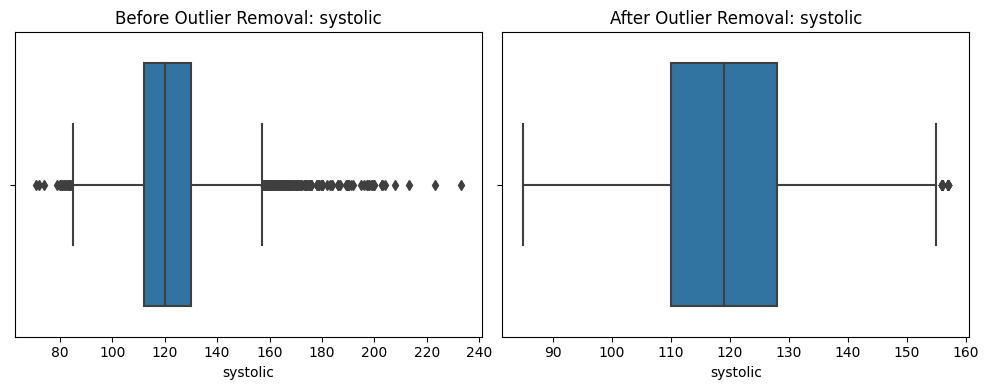

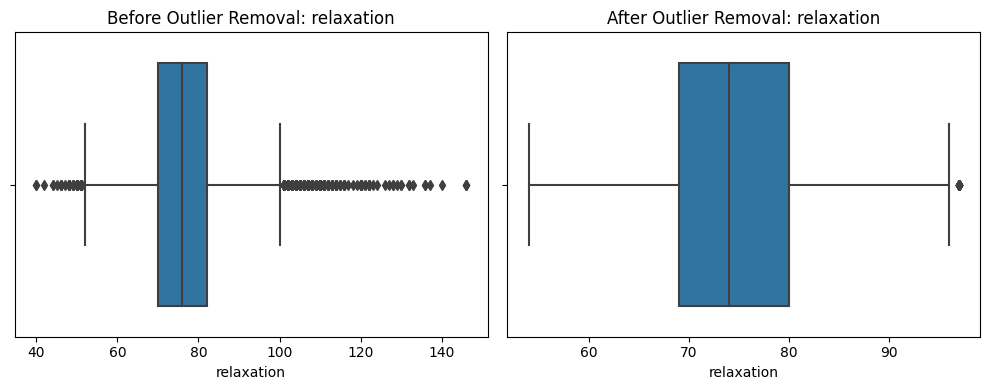

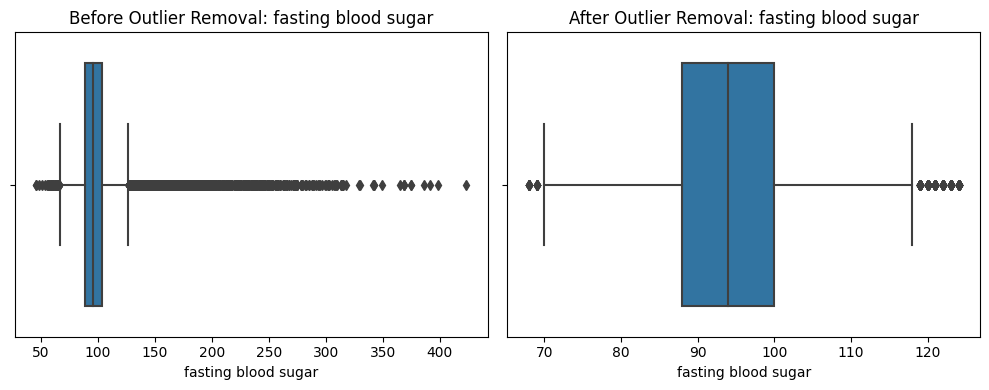

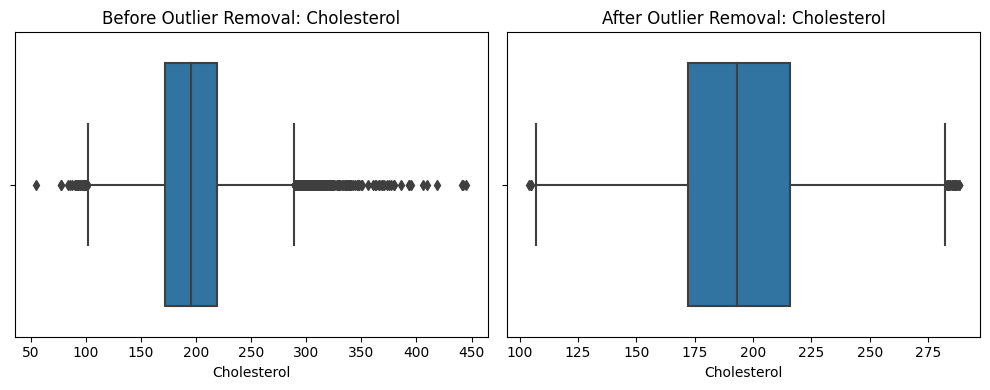

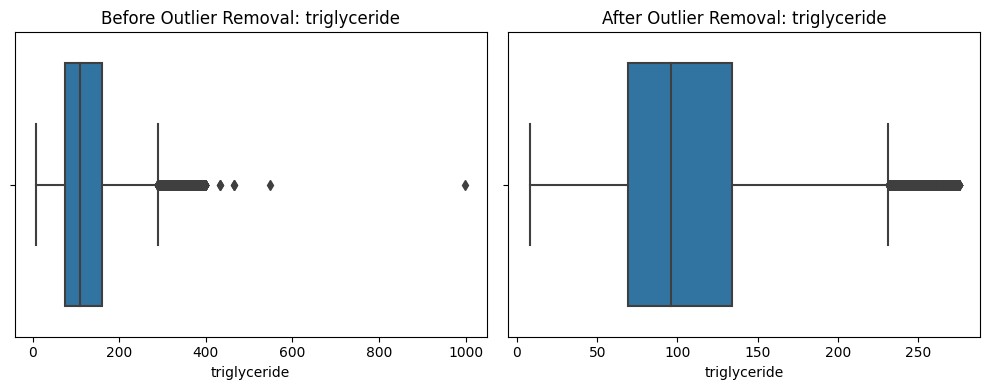

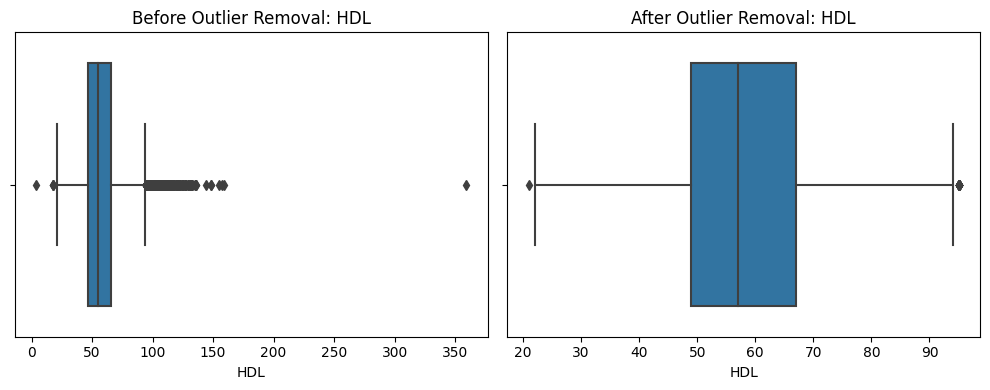

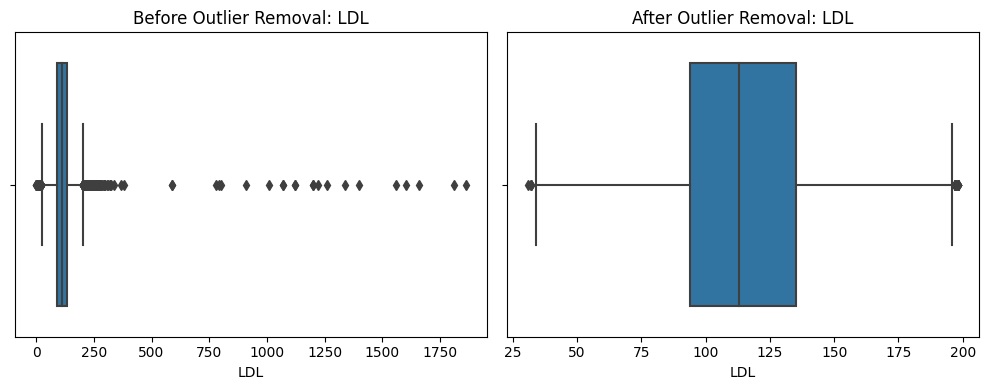

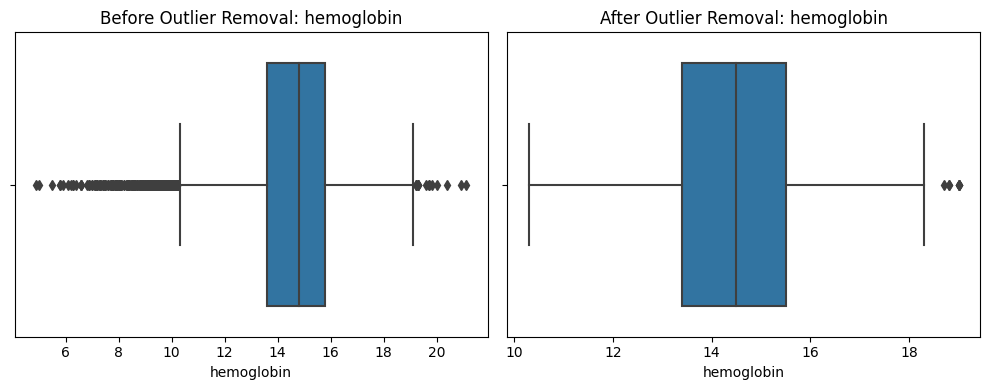

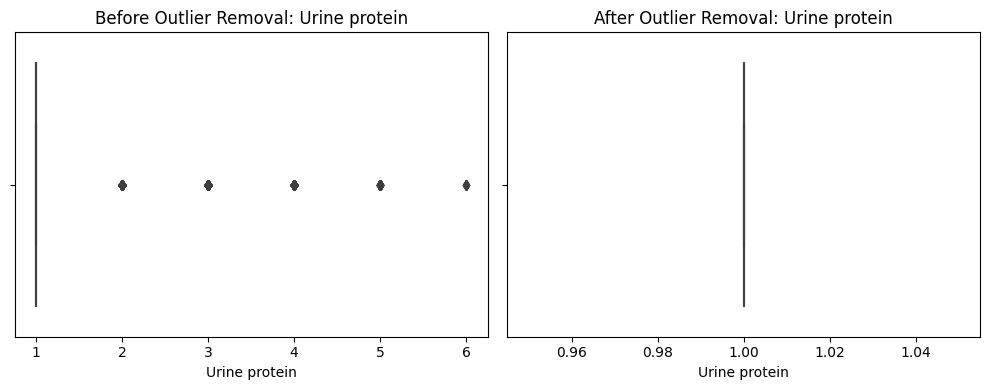

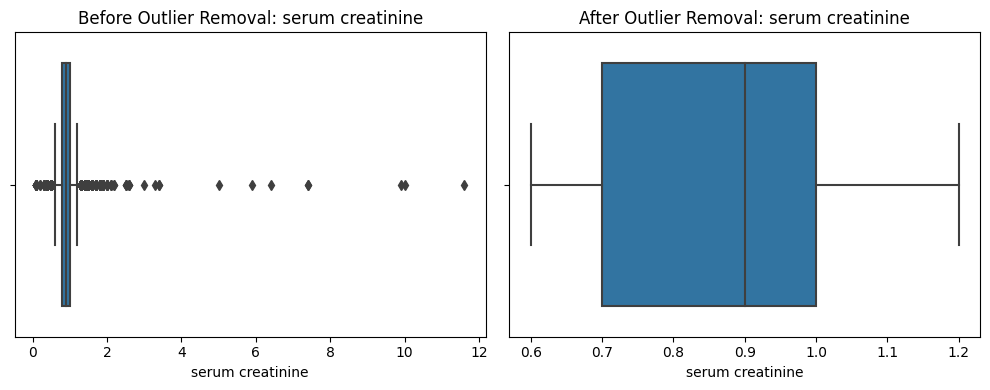

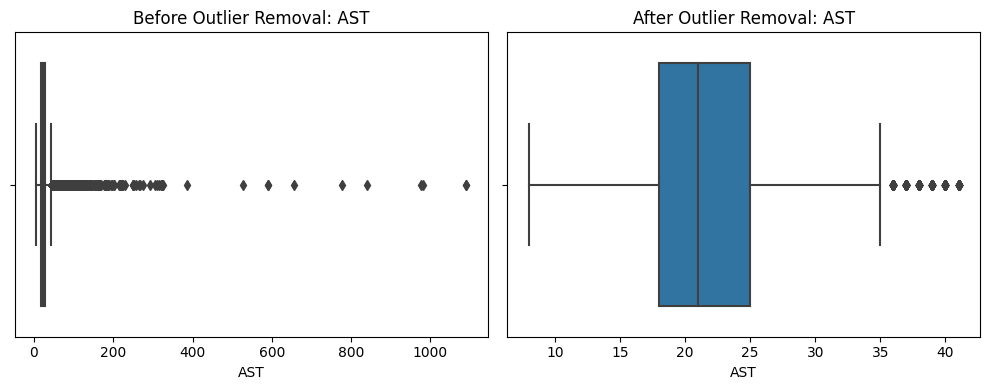

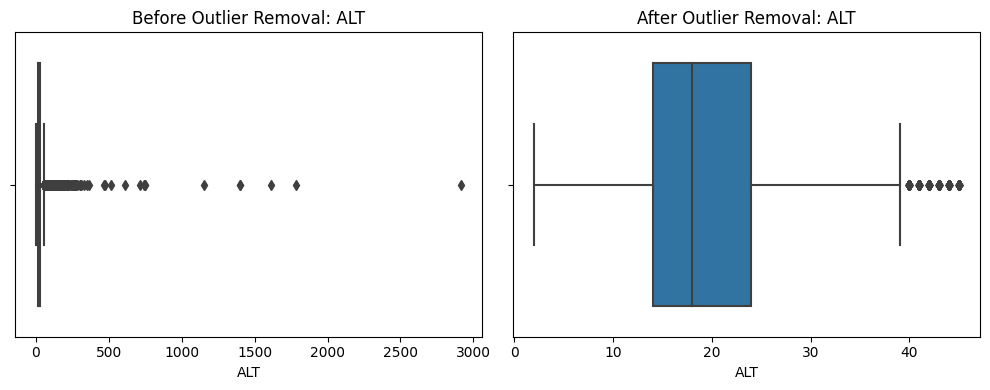

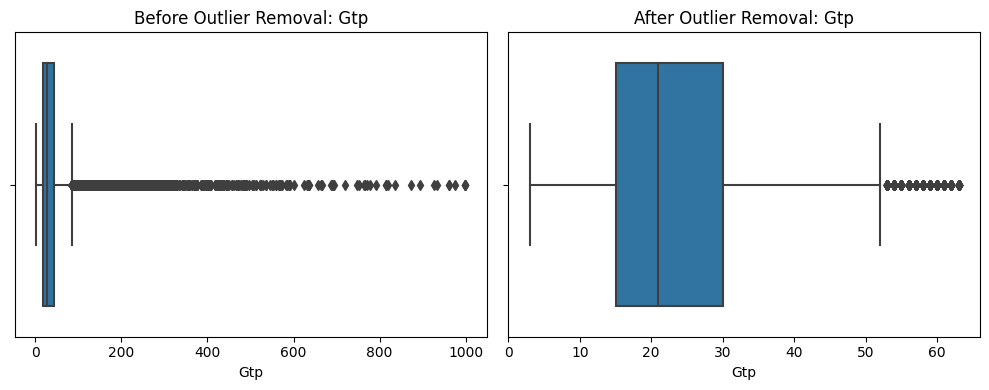

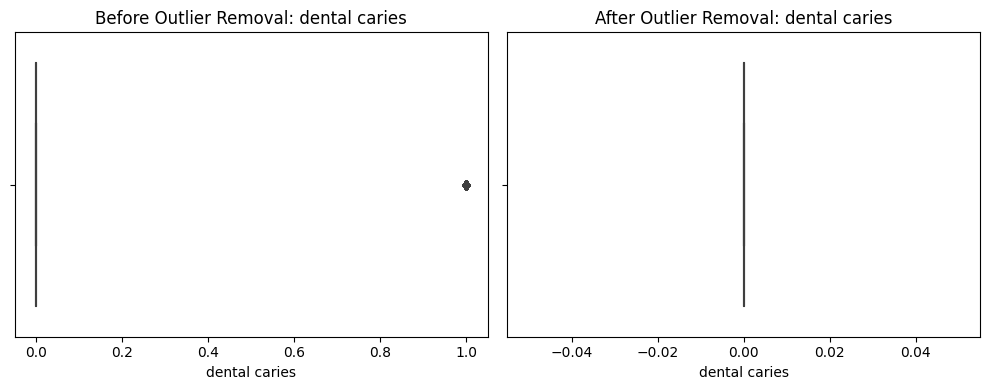

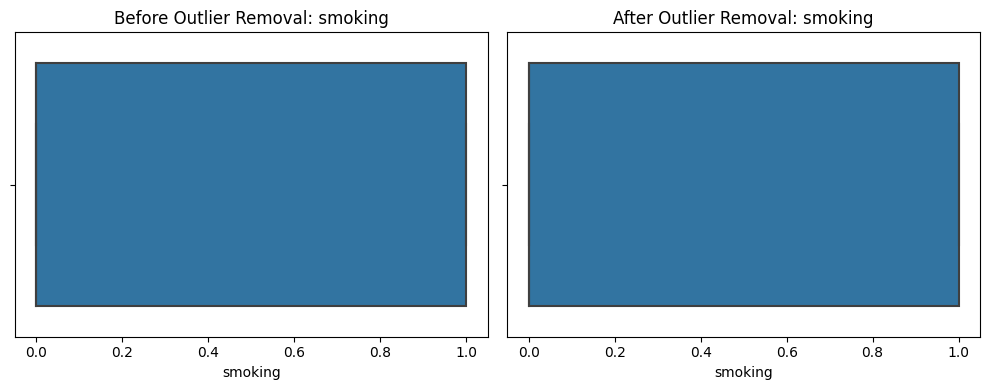

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Drop outliers using IQR
df_no_outliers = df.copy()

numeric_cols = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & 
                                    (df_no_outliers[col] <= upper)]

print("Shape before:", df.shape)
print("Shape after:", df_no_outliers.shape)

# 2. Boxplots BEFORE and AFTER for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.boxplot(x=df[col])
    plt.title(f"Before Outlier Removal: {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f"After Outlier Removal: {col}")

    plt.tight_layout()
   
    plt.show()


# Scale Features

# Feature Enginnering

In [14]:
df_no_outliers["BMI"] = df_no_outliers["weight(kg)"] / (df_no_outliers["height(cm)"]/100)**2
df_no_outliers["bp_ratio"] = df_no_outliers["systolic"] / df_no_outliers["relaxation"]
df_no_outliers["liver_score"] = df_no_outliers["ALT"] + df_no_outliers["Gtp"]


In [15]:
df_no_outliers[["BMI", "bp_ratio", "liver_score"]].head()


,BMI,bp_ratio,liver_score
9,22.892820,1.407407,71
11,20.811655,1.750000,23
14,17.777778,1.402778,34
19,22.857143,1.571429,35
20,22.857143,1.625000,49


In [16]:
df_no_outliers.corr()["smoking"].sort_values(ascending=False)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


smoking                1.000000
hemoglobin             0.392421
height(cm)             0.380233
Gtp                    0.299074
weight(kg)             0.276889
liver_score            0.264878
serum creatinine       0.262427
triglyceride           0.203271
waist(cm)              0.190969
ALT                    0.120410
eyesight(right)        0.093519
eyesight(left)         0.079183
relaxation             0.065762
BMI                    0.061114
fasting blood sugar    0.048925
systolic               0.042915
AST                    0.003953
bp_ratio              -0.036952
LDL                   -0.049364
Cholesterol           -0.060937
age                   -0.157080
HDL                   -0.195023
hearing(left)               NaN
hearing(right)              NaN
Urine protein               NaN
dental caries               NaN
Name: smoking, dtype: float64

# Logistic Regression

Logistics Accuracy : 0.7447542397240586
Precision    : 0.5866336633663366
Recall       : 0.46108949416342415
F1-score     : 0.5163398692810457


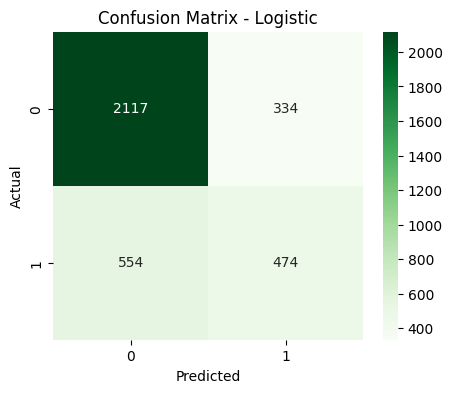

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, confusion_matrix

# Split X and y
X = df_no_outliers.drop("smoking", axis=1)
y = df_no_outliers["smoking"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression pipeline
model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistics Accuracy :", acc)
print("Precision    :", prec)
print("Recall       :", rec)
print("F1-score     :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic")
plt.savefig("logistic_confusion_matrix1.pdf", bbox_inches='tight')
plt.show()

# SVM

SVM Accuracy : 0.7677493532624318
Precision    : 0.6392405063291139
Recall       : 0.4912451361867704
F1-score     : 0.5555555555555556


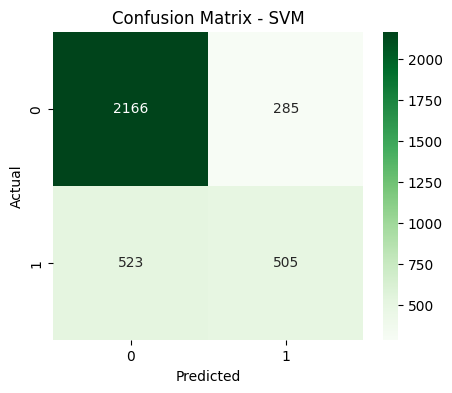

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# X and y
X = df_no_outliers.drop("smoking", axis=1)
y = df_no_outliers["smoking"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SVM pipeline (RBF kernel)
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))     # simple default SVM
])

# Fit model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVM Accuracy :", acc)
print("Precision    :", prec)
print("Recall       :", rec)
print("F1-score     :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.savefig("svm_confusion_matrix.pdf", bbox_inches='tight')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


NN Accuracy : 0.7602759413624605
Precision   : 0.5938104448742747
Recall      : 0.5972762645914397
F1-score    : 0.5955383123181377


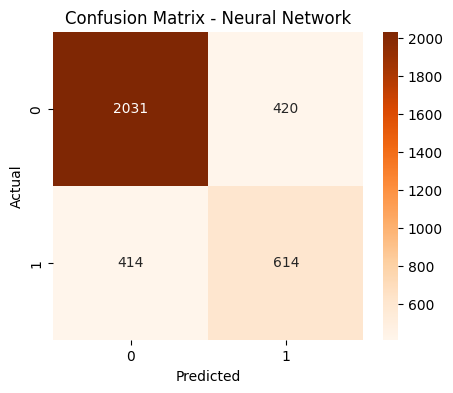

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# X and y
X = df_no_outliers.drop("smoking", axis=1)
y = df_no_outliers["smoking"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Neural Network pipeline
nn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(hidden_layer_sizes=(64, 32),   # simple NN
                         activation='relu',
                         max_iter=500,
                         random_state=42))
])

# Fit
nn_model.fit(X_train, y_train)

# Predictions
y_pred = nn_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("NN Accuracy :", acc)
print("Precision   :", prec)
print("Recall      :", rec)
print("F1-score    :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.savefig("nn_confusion_matrix.pdf", bbox_inches='tight')
plt.show()


# Deep Neural Network

DNN Accuracy : 0.7858580051739006
Precision    : 0.6556655665566556
Recall       : 0.5797665369649806
F1-score     : 0.6153846153846154


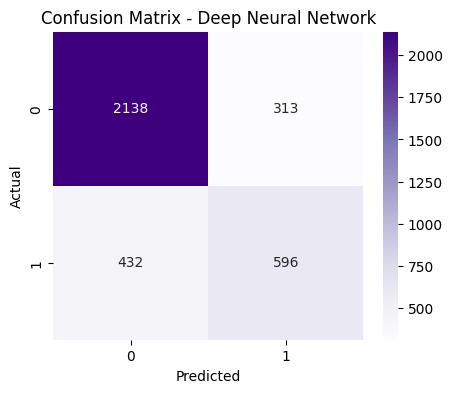

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# X and y
X = df_no_outliers.drop("smoking", axis=1)
y = df_no_outliers["smoking"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Deep Neural Network (3 layers)
dnn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32),
                         activation='relu',
                         solver='adam',
                         learning_rate_init=0.0005,
                         alpha=0.001,
                         max_iter=2500,
                         early_stopping=True,
                         random_state=42))
])

# Fit
dnn_model.fit(X_train, y_train)

# Predict
y_pred = dnn_model.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("DNN Accuracy :", acc)
print("Precision    :", prec)
print("Recall       :", rec)
print("F1-score     :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Deep Neural Network")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.savefig("dnn_confusion_matrix.pdf", bbox_inches='tight')
plt.show()



MODEL PERFORMANCE TABLE:


,Accuracy,Precision,Recall,F1,ROC_AUC,CM,ROC
Logistic,0.744754,0.586634,0.461089,0.51634,0.815606,"[[2117, 334], [554, 474]]","([0.0, 0.0, 0.0, 0.0004079967360261118, 0.0004..."
SVM,0.767749,0.639241,0.491245,0.555556,0.827238,"[[2166, 285], [523, 505]]","([0.0, 0.0, 0.0, 0.0004079967360261118, 0.0004..."
Neural Network,0.760276,0.59381,0.597276,0.595538,0.806196,"[[2031, 420], [414, 614]]","([0.0, 0.0, 0.0, 0.0004079967360261118, 0.0004..."
DeepNN,0.785858,0.655666,0.579767,0.615385,0.83333,"[[2138, 313], [432, 596]]","([0.0, 0.0, 0.0, 0.0004079967360261118, 0.0004..."


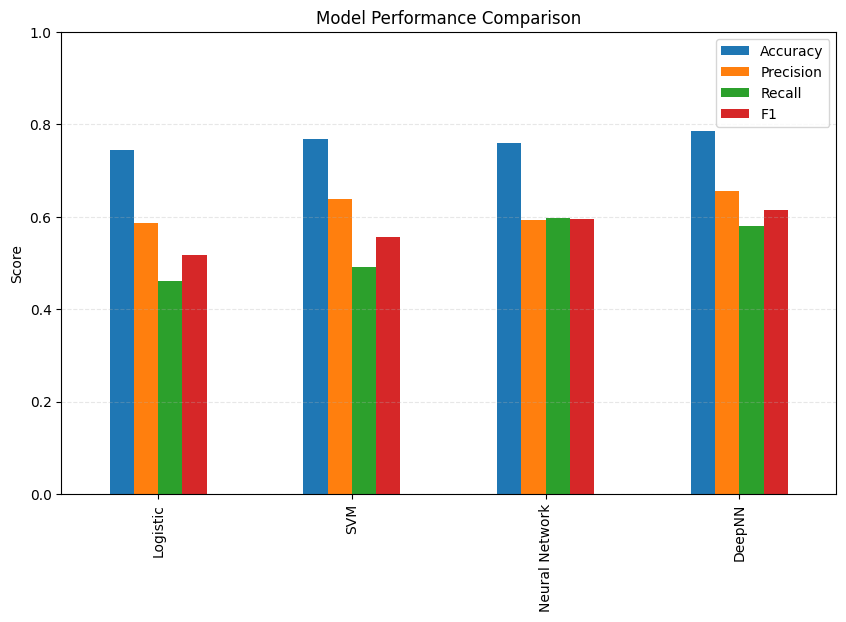

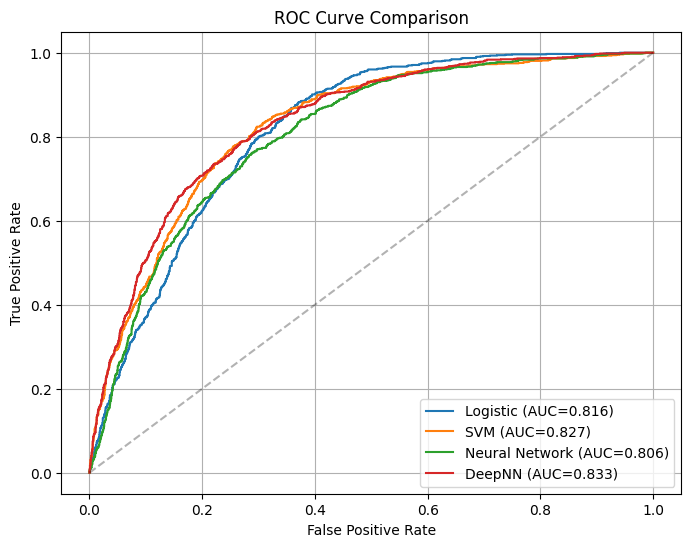

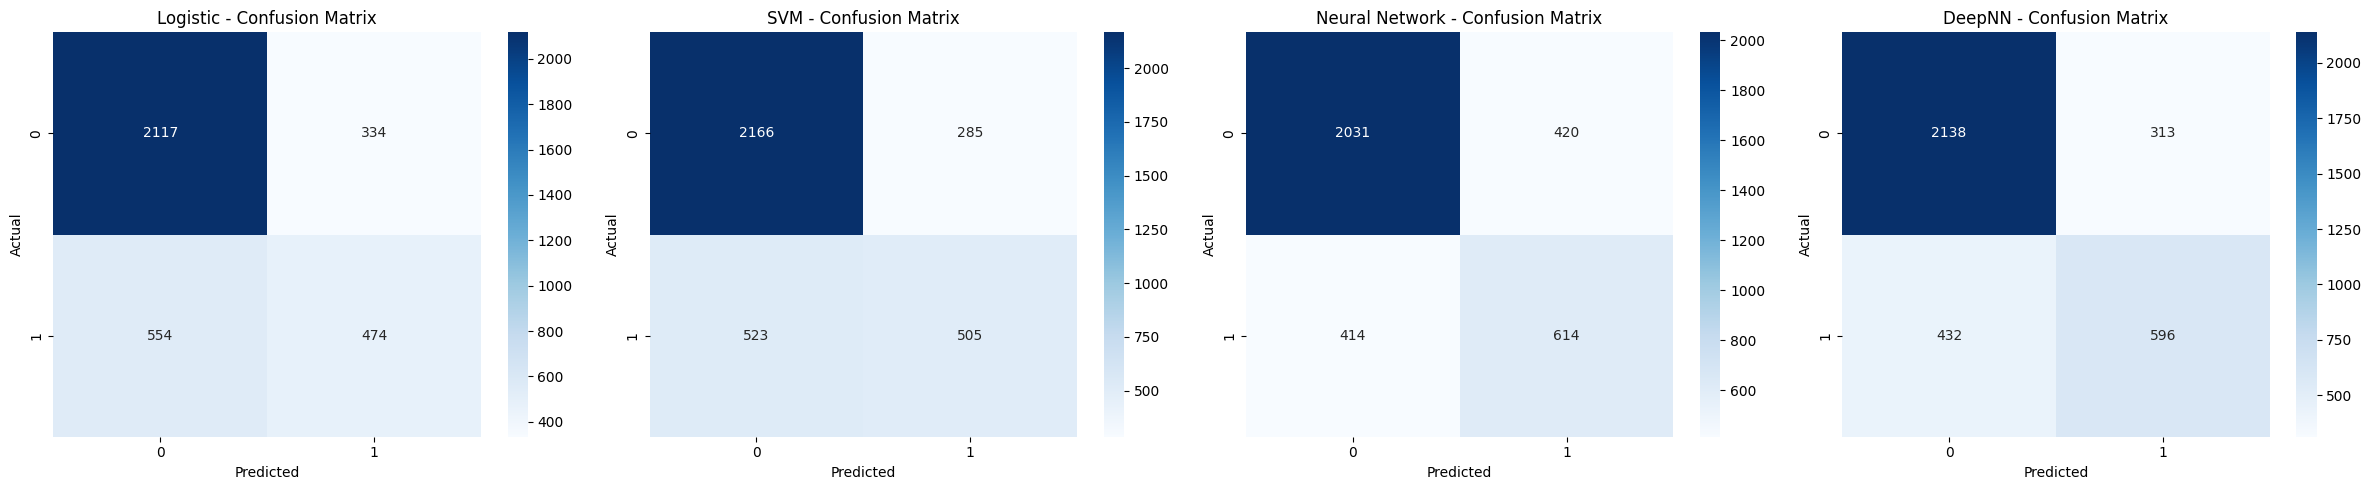

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)

# --------------------------
# Put your already trained models here
# --------------------------
models = {
    "Logistic": model,
    "SVM": svm_model,
    "Neural Network" : nn_model,
    "DeepNN": dnn_model
}
# Example:
# log_model = your logistic regression pipeline
# svm_model = your trained SVC pipeline
# nn_model  = your trained MLP pipeline

# --------------------------
# Evaluate models
# --------------------------
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Probability or decision score (for ROC)
    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.decision_function(X_test)
        except:
            y_score = None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_score) if y_score is not None else np.nan,
        "CM": confusion_matrix(y_test, y_pred),
        "ROC": (roc_curve(y_test, y_score) if y_score is not None else None)
    }

# --------------------------
# Table of metrics
# --------------------------
df_results = pd.DataFrame(results).T
print("\nMODEL PERFORMANCE TABLE:")
display(df_results)

# --------------------------
# Bar Plot - Accuracy, Precision, Recall, F1
# --------------------------
metrics = ["Accuracy", "Precision", "Recall", "F1"]
df_results[metrics].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.savefig("model_performance.pdf", bbox_inches='tight')
plt.show()

# --------------------------
# ROC Curves
# --------------------------
plt.figure(figsize=(8,6))
for name, res in results.items():
    roc_vals = res["ROC"]
    if roc_vals is not None:
        fpr, tpr, _ = roc_vals
        auc_score = res["ROC_AUC"]
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

plt.plot([0,1], [0,1], 'k--', alpha=0.3)
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.savefig("roc_curve_comparison.pdf", bbox_inches='tight')
plt.show()

# --------------------------
# Confusion Matrices (Side-by-side)
# --------------------------
plt.figure(figsize=(6 * len(models), 5))

for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, len(models), i+1)
    sns.heatmap(res["CM"], annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [ ]:
RADBOUD UNIVERSITY
		\\ [1.0cm]
		% Change to your faculty if needed
		\includegraphics[width=25mm]{img/in_dei_nomine_feliciter.eps}  \\[.5cm]
		and   \\[.5cm]
		\includegraphics[width=50mm]{img/company_Logo.png}\\[.5cm]
		\normalsize Company Name \\ [1.0cm]
		Faculty of Social Sciences\\
		\HRule{2pt} \\